In [5]:
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

## Imbalanced dataset

In [6]:
df = pd.read_csv('./datasets/label_data.csv')
df = df.rename(columns={'label': 'target'})
df.head()

,temperature,pressure,humidity,target
0,0.704168,0.022927,0.709663,0
1,0.802950,0.019962,0.595711,0
2,0.905664,0.022182,0.423415,0
3,0.528210,0.011131,0.849041,0
4,0.514628,0.022178,0.857126,0


In [7]:
X = df.drop('target', axis=1).values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

Accuracy: 0.8598


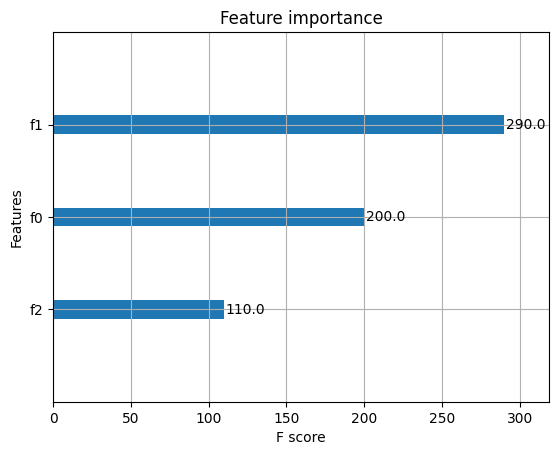

In [8]:
model = xgb.XGBClassifier(
    learning_rate=0.001, 
    n_estimators=10, 
    min_child_weight=1,
    gamma=0,
    subsample=1,
    scale_pos_weight=1,
    random_state=27,
    )

model.fit(X_train, y_train)

y_test, y_pred = y_test, model.predict(X_test)
print("Accuracy: %.4g" % metrics.accuracy_score(y_test, y_pred))

plot_importance(model)
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
y_pred_test = forest.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.8836129206882339

In [11]:
confusion_matrix(y_test, y_pred_test)

array([[136167,   3763],
       [ 15157,   7474]], dtype=int64)

In [12]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94    139930
           1       0.67      0.33      0.44     22631

    accuracy                           0.88    162561
   macro avg       0.78      0.65      0.69    162561
weighted avg       0.87      0.88      0.87    162561


## Balanced dataset

In [13]:
df = pd.read_csv('./datasets/sm_data.csv')
X = df.drop('target', axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
y_pred_test = forest.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.8626415444920478

In [15]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86    139929
           1       0.86      0.87      0.86    139930

    accuracy                           0.86    279859
   macro avg       0.86      0.86      0.86    279859
weighted avg       0.86      0.86      0.86    279859
